In [1]:
import numpy
import sympy
from sympy.vector import *
from matplotlib import pyplot
from scipy.integrate import quad
from scipy.integrate import quad_vec

In [2]:
from matplotlib.pyplot import *
from seaborn import *
from matplotlib import rcParams
%matplotlib inline
set(style='darkgrid')

In [3]:
x, y, z, u1, u2, u3, v1, v2, v3, t = sympy.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

# Vectors and Geometry
* In Computer Science... Vectors are represented in Matrix Format
* We are working with 3D vectors

Numerical or symbolic

In [4]:
A = numpy.array([1,2,3]) # Vector A (Algebric Representation)
B = numpy.array([7,8,9]) # Vector B (Algebric Representation)
U = sympy.Matrix([u1,u2,u3]) # Vector U (Geometric Representation of component form)
V = sympy.Matrix([v1,v2,v3]) # Vector V (Geometric Representation of component form)

## Addition and multiplication of 3D Vectors

In [5]:
A+B # Addition of vector a & vector b (Algebric Representation)

array([ 8, 10, 12])

In [6]:
2*(A+B) # Multiply 2 with the addition of vector a & vector b (Algebric Representation)

array([16, 20, 24])

In [7]:
U+V # Addition of vector u & vector v (Geometric Representation of component form)

Matrix([
[u_1 + v_1],
[u_2 + v_2],
[u_3 + v_3]])

In [8]:
2*(U+V) # Multiply 2 with the addition of vector u & vector v (Geometric Representation of component form)

Matrix([
[2*u_1 + 2*v_1],
[2*u_2 + 2*v_2],
[2*u_3 + 2*v_3]])

## Dot products of 3D Vectors (Scaler Output)
* Dot product means one vectors is projected towards the direction of other vector & then multiply their length magnitude

In [9]:
numpy.dot(A, B) # Dot product of Vector a & vector b (Scaler Output)

50

In [10]:
U.dot(V) # Dot product of Vector u & vector v (Scaler Output)

u_1*v_1 + u_2*v_2 + u_3*v_3

## Cross products of 3D Vectors (Area & Torque Output)
* Geometric Cross Product (Area of Parallellogram). Magnitude of two vectors Cross Product Represents the Area of the Parallellogram which is made by those two vectors. It also represents the Length Magnitude of the Torque Vector.
* A x B = ||A|| ||B|| Sinθ û (Torque Vector)
* || A x B || = ||A|| ||B|| Sinθ (This is the Area of the Parallelogram made by those 2 vectors, Length Magnitude of the Torque Vector)

In [11]:
numpy.cross(A,B) # Algebric Cross Product of Vector a & vector b (Torque Vector Output)

array([-6, 12, -6])

In [12]:
Torque_unit_direction_vector = numpy.cross(A,B) / numpy.linalg.norm(numpy.cross(A,B))
print(Torque_unit_direction_vector) # Direction Unit Vector of the Torque Vector

[-0.40824829  0.81649658 -0.40824829]


In [13]:
# || A x B || = ||A|| ||B|| Sinθ (Magnitude of Cross Product for Area of the Parallelogram as Scaler Output)
numpy.linalg.norm(numpy.cross(A,B))

14.696938456699069

In [14]:
# A x b = ||a|| ||b|| Sinθ û (Again we will get the Cross Product, Torque Vector Output)
numpy.linalg.norm(numpy.cross(A,B)) * Torque_unit_direction_vector

array([-6., 12., -6.])

In [15]:
# Magnitude of 3, 3D Vectors Triple Cross Product ie Volume of the Parallelogram made by those 3, 3D vectors, which also could be found by using 3D Matrix Determinant
# We will find Magnitude of the Determinant of the 3x3 Matrix for finding Volume
Vector_Mat_A_B_C = numpy.array([[1,7,8],[2,8,-9],[3,9,-16]])
print(Vector_Mat_A_B_C) # Determinant is Valid for Square Matrix in Python
numpy.linalg.norm(numpy.linalg.det(Vector_Mat_A_B_C))

[[  1   7   8]
 [  2   8  -9]
 [  3   9 -16]]


59.999999999999986

In [16]:
U.cross(V) # Algebric Cross Product of Vector u & vector v (Geometric Representation of component form), Torque Vector Output

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [17]:
numpy.linalg.norm(numpy.cross(A,B)) # || A x B || = ||A|| ||B|| Sinθ (Magnitude of Cross Product for Scaler Area of the Parallelogram)

14.696938456699069

## Scaler Length Magnitude of vectors

In [18]:
numpy.linalg.norm(A) # Scaler Length Magnitude of vectors A

3.7416573867739413

In [19]:
U.norm() # Scaler Length Magnitude of vectors U

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

In [20]:
V.norm() # Scaler Length Magnitude of vectors V

sqrt(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)

## Projection of A Vector towards the Direction of Another Vector (Used in DOT Product for Scaler Output)
* Projection of Vector U towards the direction of Vector V interms of Cos(θ)
* We made projection of one vector towards the direction of another vector & then multiply their length magnitude

$\text{proj}_V(U) = \frac{U \cdot V}{|V|^2} V$

In [21]:
proj_b_A = numpy.dot(A,B)/numpy.linalg.norm(B)**2 * B
proj_b_A # Projection of A Vector towards the Direction of B Vector

array([1.80412371, 2.06185567, 2.31958763])

In [22]:
proj_v_U = U.dot(V)/V.norm()**2 * V
proj_v_U # Projection of U Vector towards the Direction of V Vector

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

## Equation of Straight Lines & Hyperplanes in 3D Space

Lines: $\vec{r}(t) = \vec{r}_0 + t\vec{v}$
* Direction Vector & Unit Direction Vector both are Different.
* For craeting equation of a Straight Line in 3D Space we need a specifit point & a 3D direction vector.

In [23]:
r0 = sympy.Matrix([1,1,1])
v = sympy.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Hyperplanes: $\vec{n} \cdot (P_0-\left<x,y,z\right>) = 0$
* For craeting equation of a Hyperplane in 3D Space we need a point on that hyperplane and a Vector which is Normal to that Hyperplane.

In [24]:
P0 = sympy.Matrix([4,4,8])
r = sympy.Matrix([x,y,z])
n = sympy.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

**Examples** Find Vector parallel to the line of intersection of the two Hyperplanes $3x-6y-2z = 15$ and $2x+y-2z=5$. (It's  going to be perpendicular to both normal vectors of the two Hyperplanes)

In [25]:
n1 = numpy.array([-3,6,2])
n2 = numpy.array([-2,-1,2])
ans = numpy.cross(n1,n2)
ans

array([14,  2, 15])

# Position Vector function's Calculus
* Position Vector function's Slope Derivative at the Point of Tangency

In [26]:
r = sympy.Matrix([3*t, sympy.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [27]:
sympy.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

Example: Find the angle between the velocity and acceleration as a function of time $\theta(t)$
* Find the Angle Between 2 Vectors from Tail to Tail position.

In [28]:
v = sympy.diff(r,t)
a = sympy.diff(v,t)
theta = sympy.acos(v.dot(a)/(v.norm()*a.norm())).simplify()

In [29]:
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [30]:
theta.subs(t,6).evalf()

0.251108015692338

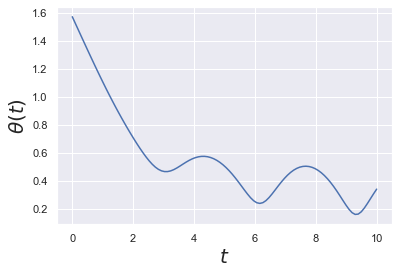

In [31]:
tt = numpy.linspace(0, 10, 100)
aa = sympy.lambdify([t], theta)(tt)
pyplot.plot(tt,aa)
pyplot.xlabel('$t$', fontsize=20)
pyplot.ylabel(r'$\theta(t)$', fontsize=20)
pyplot.show()

## Position Vectors Function's Area Anti-Derivative (For Specific Interval)

Note: Will not add the +C

In [32]:
r = sympy.Matrix([sympy.exp(t)*sympy.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [33]:
sympy.Integral(r).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In some cases Anti-Derivative cannot be evaluated symbolically: must solve definite Anti-Derivative numerically:

In [34]:
r = sympy.Matrix([sympy.exp(t**2)*sympy.cos(t)**3, sympy.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

Integrate from $t=0$ to $t=4$

In [35]:
r_num = sympy.lambdify([t], r)

In [36]:
r_num = sympy.lambdify([t], r)
quad_vec(r_num, 0, 4)[0]

array([[-4.83559254e+05],
       [ 9.06402477e-01],
       [ 6.70972506e-01]])

## Arclength of A 3D Position Vector Function (For Specific Interval)
* For finding Arclength of A 3D Position Vector Function (For Specific Interval), first we find the Solpe Derivative equation of the function, then find Magnitude equation of that derivative function and then apply the specific interval as line antiderivative.

$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Rare Cases can be done symbolically. Find arclength of $\left< 0, t, t^2 \right>$ from $t=0$ to $t=1$

In [37]:
r = sympy.Matrix([0, t, t**2])
sympy.integrate(sympy.diff(r,t).norm(), (t,0,1))

asinh(2)/4 + sqrt(5)/2

In most cases needs to be done numerically. Find arclength of $\left< e^t, \sin(t), t^4 \right>$ from $t=0$ to $t=1$

In [38]:
r = sympy.Matrix([sympy.exp(t), sympy.sin(t), t**4])
r_num = sympy.lambdify([t], sympy.diff(r,t).norm())
quad(r_num, 0, 1)[0]

2.316977146444862

## Other Relavent Quantities of Position Vector Functions

If $ds = \sqrt{dx^2 + dy^2 + dz^2}$ is the arclength element $ds/dt = \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } = |d\vec{r}/dt| = |\vec{v}|$ then the other quantities of importance are

* Unit Tangent vector: $\vec{T} = \frac{d\vec{r}}{dt}\frac{1}{|d\vec{r}/dt|} = \vec{v}/|\vec{v}|$ (Direction of the Slope or unit Direction of the Tangent Vector, Heading Direction)
* Curvature: $\kappa = |\frac{d\vec{T}}{dt}|\frac{1}{|\vec{v}|}$ (We find Curvature Vector by doing double derivative of the Position Vector Function)
* Unit normal vector to Curve: $\vec{N} = \frac{d\vec{T}/dt}{|d\vec{T}/dt|}$ (Unit Direction of the Curvature Vector, Turning Direction)
* Unit Bi-Normal Vector = Unit Tangent vector * Unit normal vector (Twisting Direction ie Tortion)
* All vectors are perpendicular to each other.

**Example** Find all these for $\vec{r}(t) = \left<a\cos(t)e^t, b\sin(t), ct\right>$

In [39]:
t, a, b, c = sympy.symbols('t a b c', pos=True, real=True)

Define the path

In [40]:
r = sympy.Matrix([a*sympy.cos(t)*sympy.exp(t), b*sympy.sin(t), c*t])
r

Matrix([
[a*exp(t)*cos(t)],
[       b*sin(t)],
[            c*t]])

Define the velocity vector $\vec{v}$ and speed $|\vec{v}|$

In [41]:
v = sympy.diff(r, t)
v_norm = v.norm()

Get $\vec{T}$, $\kappa$, and $\vec{N}$

In [42]:
T = v/v_norm
kappa = sympy.diff(T, t).norm()/v_norm
N = sympy.diff(T,t)/sympy.diff(T,t).norm()

Can evaluate these quantities or make plots

In [43]:
kappa.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

0.00775458595406284

In [44]:
N.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

Matrix([
[-0.152946073876551],
[-0.204518432770271],
[-0.966840063890063]])

Can also make continuous plots

In [45]:
kappa_num = sympy.lambdify([t,a,b,c], kappa)

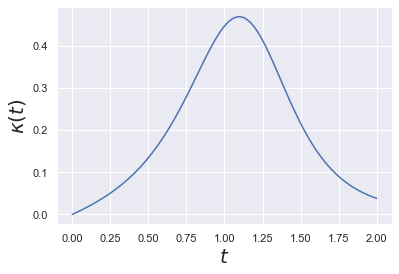

In [46]:
tt = np.linspace(0, 2, 100)
kk = kappa_num(tt, 1, 2, 3)
pyplot.plot(tt, kk)
pyplot.xlabel('$t$', fontsize=20)
pyplot.ylabel('$\kappa(t)$', fontsize=20)
pyplot.show()

# Partial/Directional Derivatives of Multivariate 3D Scaler Function for It's Surface
* When we combine partial derivatives in a Vector Form, we get Gradient Vector of a Multivariate Scaler Function for It's Surface

In [47]:
x, y, z = sympy.symbols('x y z')

## Basics

Partial Derivatives $\partial f / \partial x$ and $\partial f / \partial y$ of $f(x,y)=y^2\sin(x+y)$

In [48]:
f = y**2 * sympy.sin(x+y)
sympy.diff(f,x)

y**2*cos(x + y)

In [49]:
sympy.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

Or more complicated things like $\frac{\partial^3 f}{\partial xy^2}$

In [50]:
sympy.diff(f,y,y,x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

## The Chain Rule for Multivariate Scaler Function

In [51]:
t = sympy.symbols('t')
x, y, z, w, v =sympy.symbols('x, y, z w v', cls=sympy.Function)

* Suppose $x$, $y$, and $z$ are functions of $t$ 
* $w$ is a function of $x$, $y$, and $z$. i.e $w=w(x,y,z)$

Find $dw/dt$

In [52]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

Can keep things in a more functional form:

In [53]:
sympy.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Or put in specific functions:

In [54]:
w1 = x**2+sympy.exp(y)*sympy.sin(z)
sympy.diff(w1,t).subs([(x, sympy.sin(t)),
                    (y, sympy.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## Gradients for the Surface of Multivariate Scaler Function

Gradients: $\nabla f$. Now we are dealing with particular coordinate systems, so we must be careful:

In [55]:
C = CoordSys3D('')

In [56]:
f = C.x*sympy.sin(C.y)
gradient(f)

(sin(.y))*.i + (.x*cos(.y))*.j

In [57]:
gradient(f).to_matrix(C)

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

In [58]:
gradient(f).to_matrix(C).subs([(C.y, 1)])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

## Fully Directional Derivatives for the Surface of Multivariate Scaler Functions

Directional derivatives $D_u f = \nabla f \cdot u$

In [59]:
u = 4*C.i - 3*C.j + 2*C.k
# Make into unit vector
u = u.normalize()
u

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [60]:
gradient(f).dot(u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29

## Extreme Values (critical points) and Saddle Points of Multivariate Scaler Functions

Extreme values of $f(x,y)$ can occur at

* 1. Boundary points of the domain of $f$
* 2. Critical Points ($f_x=f_y=0$)

If

* (i) $f_{xx}<0$ and $f_{xx}f_{yy} - f_{xy}^2>0$ at (a,b) then **local maximum**
* (ii) $f_{xx}>0$ and $f_{xx}f_{yy} - f_{xy}^2>0$ at (a,b) then **local minimum**
* (iii) $f_{xx}f_{yy} - f_{xy}^2 < 0$ at (a,b) then **saddle point**
* (iv) $f_{xx}f_{yy} - f_{xy}^2 = 0$ at (a,b) then **inconclusive** (kind of **Inflection** point)

In [61]:
x, y = sympy.symbols('x y', real=True)
f = x**3 + 3*x*y + y**3
f

x**3 + 3*x*y + y**3

In [62]:
sympy.solve([sympy.diff(f,x), sympy.diff(f, y)])

[{x: -1, y: -1}, {x: 0, y: 0}]

In [63]:
fxx = sympy.diff(f,x,x)
fyy = sympy.diff(f,y,y)
fxy = sympy.diff(f,x,y)

Testing the first point

In [64]:
fxx.subs([(x,-1),(y,-1)])

-6

In [65]:
test = fxx*fyy-fxy**2
test.subs([(x,-1),(y,-1)])

27

Thus the first point is a local maximum!

## Lagrange Multipliers (For Constraint Optimisation function)
* As an example we can use **One Sheet Hyperboloid Function** as constraint function for Optimisation and apply this upon the Multivariate Scaler Function's Surface.

Minimize $f(x,y,z)$ subject to the constraint $g(x,y,z)=0$

* Requires solving the two equations $\nabla f = \lambda \nabla g$ and $g(x,y,z)=0$

**Example**: A space probe has the shape of an ellipsoid $4x^2 + y^2 + 4z^2 = 16$ and after sitting in the sun for an hour. the temperature on its surface is given by $T(x,y,z)=8x^2+4yz-16z+600$. Find the hottest point on the surface

Note that $g=4x^2 + y^2 + 4z^2 - 16 = 0$ and $f=T = 8x^2+4yz-16z+600$ here

In [70]:
C = CoordSys3D('')

In [71]:
lam = sympy.symbols('\lambda')
g = 4*C.x**2 + C.y**2 + 4*C.z**2 - 16
f = 8*C.x**2 + 4*C.y*C.z-16*C.z+600
eq1 = gradient(f)-lam*gradient(g)
eq1 = eq1.to_matrix(C)
eq2 = g
sols = sympy.solve([eq1, eq2])
sols

[{.x: -4/3, .y: -4/3, .z: -4/3, \lambda: 2},
 {.x: 0, .y: -2, .z: -sqrt(3), \lambda: sqrt(3)},
 {.x: 0, .y: -2, .z: sqrt(3), \lambda: -sqrt(3)},
 {.x: 0, .y: 4, .z: 0, \lambda: 0},
 {.x: 4/3, .y: -4/3, .z: -4/3, \lambda: 2}]

In [72]:
for sol in sols:
    print(f.subs(sol).evalf())

642.666666666667
641.569219381653
558.430780618347
600.000000000000
642.666666666667


First and last solutions are the points where the probe is the hottest.

# Double Anti-Derivative of a Multivariate Scaler Functions for finding Volume under a 3D or Multi dimentional function Surface (Surface Integral).

In rare cases these can be done symbolically:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xdzdydx$$

In [73]:
x, y, z = sympy.symbols('x, y, z')
f = x
sympy.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

But most of the time they need to be done numerically, such as in this example:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xe^{-y}\cos(z)dzdydx$$

In [74]:
# Wont Run!!
#x, y, z = sympy.symbols('x, y, z')
#f = x*sympy.exp(-y)*sympy.cos(z)
#sympy.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

Use scipy to evaluate this numerically

In [75]:
from scipy.integrate import tplquad
f = lambda z, y, x: x*np.exp(-y)*np.cos(z)
tplquad(f, 0, 1,
        lambda x: 0, lambda x: 1-x**2,
        lambda x, y: 3, lambda x, y: 4-x**2-y**2)[0]

-0.09109526451447894

# Integrals and Vector Fields

## Line Integrals (Scalar)

Given $\vec{r}(t) = \left< g(t), h(t), k(t) \right>$ the line integral of $f(x,y,z)$ along the curve is

$$\int_C f(x,y,z) ds = \int_a^b f(g(t), h(t), k(t))|d\vec{r}/dt|dt$$

In [76]:
t = sympy.symbols('t', real=True)
x, y, z, f = sympy.symbols('x y z f', cls=sympy.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = sympy.Matrix([x, y, z])
f = f(x,y,z)

In [77]:
integrand = f*sympy.diff(r,t).norm()
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

Suppose 
* $\vec{r}(t) = \left<\cos(t), \sin(t), t \right>$ 
* $f(x,y,z)=2xy+\sqrt{z}$ 

and we are going from $t=0$ to $t=2\pi$. In this case it can be solved symbolically:

In [78]:
integrand1 = integrand.subs([(f, 2*x*y+sympy.sqrt(z)),
                            (x, sympy.cos(t)),
                            (y, sympy.sin(t)),
                            (z, t)]).doit().simplify()
sympy.integrate(integrand1, (t, 0, 2*sympy.pi))

sqrt(2)/2 + sqrt(2)*(-1/2 + 4*sqrt(2)*pi**(3/2)/3)

In general, can't be done symbolically. Consider now

* $\vec{r}(t) = \left<3\cos(t), 2\sin(t), e^{t/4} \right>$ 
* $f(x,y,z)=2xy+\sqrt{z}$ 

and we are going from $t=0$ to $t=2\pi$.

In [79]:
integrand2 = integrand.subs([(f, 2*x*y+sympy.sqrt(z)),
                            (x, 3*sympy.cos(t)),
                            (y, sympy.sin(t)),
                            (z, sympy.exp(t/4))]).doit().simplify()
# Won't Run!
#sympy.integrate(integrand2, (t, 0, 2*sympy.pi))

In [80]:
integrand2

(exp(t/8) + 3*sin(2*t))*sqrt(exp(t/2) + 128*sin(t)**2 + 16)/4

Do it numerically using scipy's `quad` function

In [81]:
integrand2_num = sympy.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

21.055300456759795

## Line Integrals (Vector)

Given $\vec{r}(t) = \left< g(t), h(t), k(t) \right>$ the line integral of $\vec{F}(x,y,z)$ along the curve is

$$\int_C \vec{F}(x,y,z) \cdot d\vec{r} = \int_a^b\vec{F}(g(t), h(t), k(t)) \cdot \frac{d\vec{r}}{dt} dt$$

In [82]:
t = sympy.symbols('t', real=True)
x, y, z, F1, F2, F3 = sympy.symbols('x y z F_1, F_2, F_3', cls=sympy.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)
r = sympy.Matrix([x, y, z])
F = sympy.Matrix([F1, F2, F3])

In [83]:
integrand = F.dot(sympy.diff(r,t))
integrand

F_1(x(t), y(t), z(t))*Derivative(x(t), t) + F_2(x(t), y(t), z(t))*Derivative(y(t), t) + F_3(x(t), y(t), z(t))*Derivative(z(t), t)

Suppose $\vec{F} = \left< \sqrt{z}, -2x, \sqrt{y}\right>$ and $\vec{r}(t) = \left<t, t^2, t^4 \right>$ from $t=0$ to $t=1$

In [84]:
integrand1 = integrand.subs([(F1, sympy.sqrt(z)),
                             (F2, -2*x),
                             (F3, sympy.sqrt(y)),
                             (x, t),
                             (y, t**2),
                             (z, t**4)]).doit().simplify()
sympy.integrate(integrand1, (t, 0, 1))

-1/5

Often times this can't be done by hand, and one needs to evaluate numerically using scipy:

Suppose $\vec{F} = \left< \sqrt{|z|}, -2x, \sqrt{|y|}\right>$ and $\vec{r}(t) = \left<3\cos^2(t), t^2, 2\sin(t) \right>$ from $t=0$ to $t=2\pi$

In [85]:
integrand2 = integrand.subs([(F1, sympy.sqrt(sympy.Abs(z))),
                             (F2, -2*x),
                             (F3, sympy.sqrt(sympy.Abs(y))),
                             (x, 3*sympy.cos(t)**2),
                             (y, t**2),
                             (z, 2*sympy.sin(t))]).doit().simplify()
# Won't Run
#sympy.integrate(integrand2, (t, 0, 2*sympy.pi))

In [86]:
integrand2

2*(-6*t*cos(t) - 3*sqrt(2)*sin(t)*sqrt(Abs(sin(t))) + Abs(t))*cos(t)

Do it numerically using scipy's `quad` function

In [87]:
integrand2_num = sympy.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

-118.4352528130723

## Surface Integrals (Scalar)

Area of a surface parameterized by $\vec{r}(u,v)$ is given by 

$$A = \iint_S \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv$$

The surface integral of a scalar function $G(\vec{r})$ is given by

$$\iint_S G(\vec{r}(u,v)) \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv$$

2D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$. Suppose the surface density is given by $G(x,y,z)=x^2+y^2$. Find surface integral for $0<\rho<1$ and $0<\theta<2\pi$

In [88]:
rho, the = sympy.symbols(r'\rho \theta',pos=True, real=True)
x, y, z, G = sympy.symbols('x y z G', cls=sympy.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G = G(x,y,z)
r = sympy.Matrix([x, y, z])

In [89]:
integrand = G*sympy.diff(r,rho).cross(sympy.diff(r,the)).norm()
integrand

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)*G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [90]:
integrand1 = integrand.subs([(G, x**2+y**2),
                             (x, rho*sympy.cos(the)),
                             (y, rho*sympy.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

\rho**2*sqrt(4*\rho**2 + 1)*Abs(\rho)

In [91]:
sympy.integrate(integrand1, (the, 0, 2*sympy.pi), (rho, 0, 1))

pi/60 + 5*sqrt(5)*pi/12

As before, if this integral can't be done symbolically, need to use scipy to convert to numerical function.

## Surface Integrals (Vector)

The surface integral of a vector function $\vec{G}(\vec{r})$ is given by

$$\iint_S \vec{G}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv}\right) du dv$$

This is also know as the flux of the vector field $\vec{G}$ through the surface

2D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$. Suppose a vector field is given by $\vec{G}(x,y,z)=\left<y^2, z, 0 \right>$. Find the flux of $\vec{G}$ through half the surface for $0<\rho<1$ and $0<\theta<\pi$

In [92]:
rho, the = sympy.symbols(r'\rho \theta',pos=True, real=True)
x, y, z, G1, G2, G3 = sympy.symbols('x y z G_1, G_2, G_3', cls=sympy.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G1 = G1(x,y,z)
G2 = G2(x,y,z)
G3 = G3(x,y,z)
r = sympy.Matrix([x, y, z])
G = sympy.Matrix([G1, G2, G3])

In [93]:
integrand = G.dot(sympy.diff(r,rho).cross(sympy.diff(r,the)))
integrand

(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))*G_3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (-Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) + Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [94]:
integrand1 = integrand.subs([(G1, y**2),
                             (G2, z),
                             (G3, 0),
                             (x, rho*sympy.cos(the)),
                             (y, rho*sympy.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

-2*\rho**4*(sin(2*\theta)/2 + 1)*sin(\theta)

In [95]:
sympy.integrate(integrand1, (the, 0, sympy.pi), (rho, 0, 1))

-4/5

Again, if this could not be done symbolically, one would need to convert the integrand into a numpy function and integrate using scipys `quad` function, like in previous examples.

## Explicit Sympy Functionality

In [96]:
from sympy.vector import ParametricRegion

Find the mass of a cylinder with radius $a$ and height $h$ centered at origin with density $\rho(x,y)=x^2+y^2$

In [97]:
a, h, r, the, z = sympy.symbols(r'a h r \theta z', positive=True)
cylinder = ParametricRegion((r*sympy.cos(the), r*sympy.sin(the), z),
                    (the, 0, 2*sympy.pi), (z, 0, h), (r, 0, a))
vector_integrate(C.x**2 + C.y**2, cylinder)

pi*a**4*h/2

Not necessarily a fan of this functionailty because there is no clear way of converting it into an numerical function if it cannot be computed symbolically. For more see

https://docs.sympy.org/latest/modules/vector/vector_integration.html